# Import Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re
from nltk.corpus import stopwords
import string

import keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.optimizers import Adam

import pickle

# Load Data

In [1]:
def load_data(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
data = load_data("got1.txt")

In [5]:
data[:1000]

'A Game Of Thrones \nBook One of A Song of Ice and Fire \nBy George R. R. Martin \nPROLOGUE \n"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are \ndead." \n"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. \nGared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. \n"Dead is dead," he said. "We have no business with the dead." \n"Are they dead?" Royce asked softly. "What proof have we?" \n"Will saw them," Gared said. "If he says they are dead, that\'s proof enough for me." \nWill had known they would drag him into the quarrel sooner or later. He wished it had been later rather \nthan sooner. "My mother told me that dead men sing no songs," he put in. \n"My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman\'s \ntit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit fores

# Prepare Corpus

In [69]:
def clean_text(text):
    sample = text
    sample = re.sub('[%s]' % re.escape(string.punctuation), '', sample)
    sample = [word for word in sample.split() if word.isalpha()]
    sample = [word.lower() for word in sample]
    sample = " ".join(sample)
    
    return sample

In [67]:
cleaned_data = clean_text(data)

In [68]:
cleaned_data[:100]

'game thrones book one song ice fire george r r martin prologue start back gared urged woods began gr'

<BarContainer object of 2 artists>

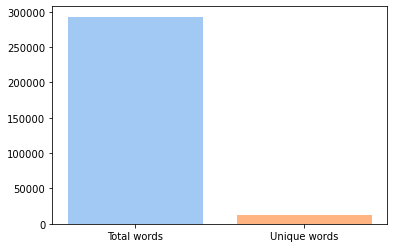

In [20]:
plt.bar(x = ["Total words", "Unique words"], 
        height=[len(cleaned_data.split()), len(set(cleaned_data.split()))], 
        color=sns.color_palette('pastel'))

In [23]:
print('Total Tokens: %d' % len(cleaned_data.split()))
print('Unique Tokens: %d' % len(set(cleaned_data.split())))

Total Tokens: 292883
Unique Tokens: 11923


In [53]:
sequences_doc = []
seq_len = 50
l = seq_len + 1
tokens = [w for w in cleaned_data.split()]

for i in range(l, len(tokens)):
    
    seq = tokens[i-l:i]

    line = ' '.join(seq)
    sequences_doc.append(line)

In [92]:
sequences_doc

['a game of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hint',
 'game of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hint of',
 'of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hint of a',
 'thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hi

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences_doc)
sequences = tokenizer.texts_to_sequences(sequences_doc)

vocab_size = len(tokenizer.word_index) + 1

In [39]:
sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

seq_length = X.shape[1]

# Prepare Model

In [42]:
def define_model(vocab_size, seq_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 50, input_length=seq_length))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))
    
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    return model

In [45]:
model = define_model(vocab_size, seq_length)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            596200    
_________________________________________________________________
lstm (LSTM)                  (None, 50, 100)           60400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 11924)             1204324   
Total params: 1,951,424
Trainable params: 1,951,424
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X, y, batch_size=128, epochs=10)

Epoch 1/10
2288/2288 [==============================] - 372s 162ms/step - loss: 6.0898 - accuracy: 0.0854
Epoch 2/10
2288/2288 [==============================] - 469s 205ms/step - loss: 5.7701 - accuracy: 0.1072
Epoch 3/10
2288/2288 [==============================] - 423s 185ms/step - loss: 5.5656 - accuracy: 0.1182
Epoch 4/10
2288/2288 [==============================] - 454s 198ms/step - loss: 5.4058 - accuracy: 0.1254
Epoch 5/10
2288/2288 [==============================] - 365s 160ms/step - loss: 5.2771 - accuracy: 0.1310
Epoch 6/10
2288/2288 [==============================] - 458s 200ms/step - loss: 5.1707 - accuracy: 0.1358
Epoch 7/10
2288/2288 [==============================] - 365s 160ms/step - loss: 5.0787 - accuracy: 0.1397
Epoch 8/10
2288/2288 [==============================] - 311s 136ms/step - loss: 4.9988 - accuracy: 0.1435
Epoch 9/10
2288/2288 [==============================] - 407s 178ms/step - loss: 4.9270 - accuracy: 0.1463
Epoch 10/10
2288/2288 [=======================

In [49]:
model.save('text_gen_model.h5')
# save the tokenizer
pickle.dump(tokenizer, open('tokenizer_text_gen.pkl', 'wb'))

# Generate Text Sequence

In [90]:
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
    # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word
        yhat = model.predict(encoded, verbose=0)
        yhat = np.argmax(yhat,axis=1)
        print(yhat)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

In [70]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)

but ser jorah tell me she commanded as she lowered herself onto her cushions was it the usurper yes the knight drew out a folded parchment a letter to viserys from magister illyrio robert baratheon offers lands and lordships for your death or your brothers my brother her sob was half



'a moment to be a man in the seven kingdoms and the king said the king said the king said i will not be a man to be a man to be a man to be a man to be a man to be a man to be a man'

In [78]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)[:60]

shoved the scabbard across the rough oak planks i had the rest made anew take it take it echoed his raven preening take it take it awkwardly jon took the sword in hand his left hand his bandaged right was still too raw and clumsy carefully he pulled it from its



'sheath and the king had been a man in the north of the night'

In [89]:
pd.read_csv("twitter_parsed_dataset.csv")["Text"][np.random.randint(0, len(pd.read_csv("twitter_parsed_dataset.csv")))]

"@mutaSawwif There isn't even a remote comparison between Abu Grahib and those images. And what happens in those images represents Islam."

In [91]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)[:60]

clasp he was being given no choice it seemed his leg throbbed and he felt as helpless as a child the targaryen girl the king groaned seven hells dont start with her again thats done ill hear no more of it why would you want me as your hand if you

[55]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]
[75]
[2]
[1]


'are the king and the king and the king and the king and the '